In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split
print(os.listdir("cancer/"))

['.DS_Store', 'test', 'train', 'val']


In [2]:
print(os.listdir("cancer/train"))

['.DS_Store', 'Cancer', 'Normal']


In [3]:
TRAIN_DIR = "cancer/train/"
TEST_DIR =  "cancer/test/"

In [4]:
#Preprocessing 
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['CANCER']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [5]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [6]:
 #X_train, y_train = preprocessing_data(TRAIN_DIR)

In [7]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['CANCER']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [8]:
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████████████████████████████████| 2483/2483 [00:11<00:00, 217.92it/s]


In [9]:
X_test , y_test = get_data(TEST_DIR)

100%|████████████████████████████████████████| 620/620 [00:03<00:00, 205.68it/s]


In [10]:
print(X_train.shape,'\n',X_test.shape)

(4961, 150, 150, 3) 
 (1240, 150, 150, 3)


In [11]:
print(y_train.shape,'\n',y_test.shape)

(4961,) 
 (1240,)


In [12]:
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)

y_train = to_categorical(y_train - 1, num_classes=2)
y_test = to_categorical(y_test - 1, num_classes=2)


In [13]:
print(y_train.shape,'\n',y_test.shape)

(4961, 2) 
 (1240, 2)


In [14]:

Pimages = os.listdir(TRAIN_DIR + "CANCER")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


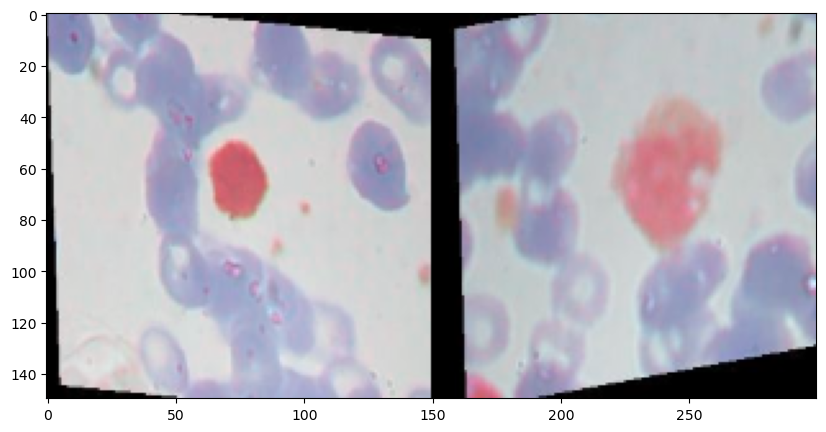

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


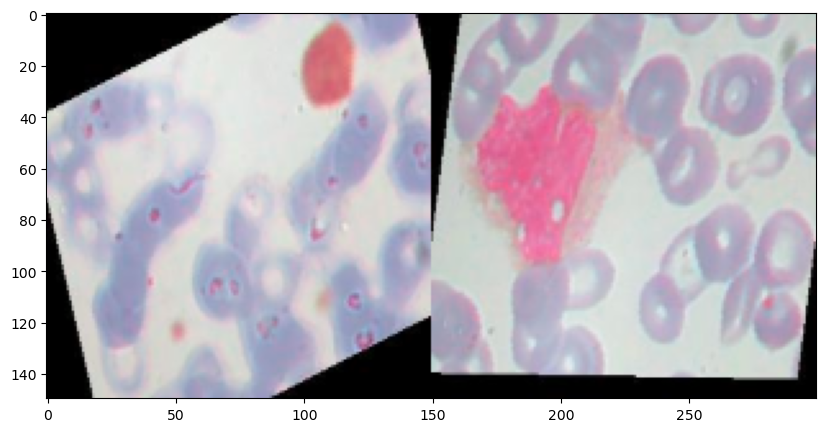

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


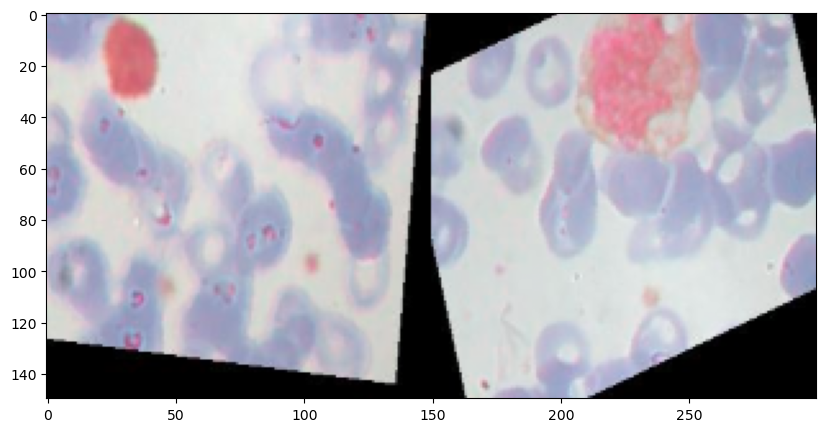

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


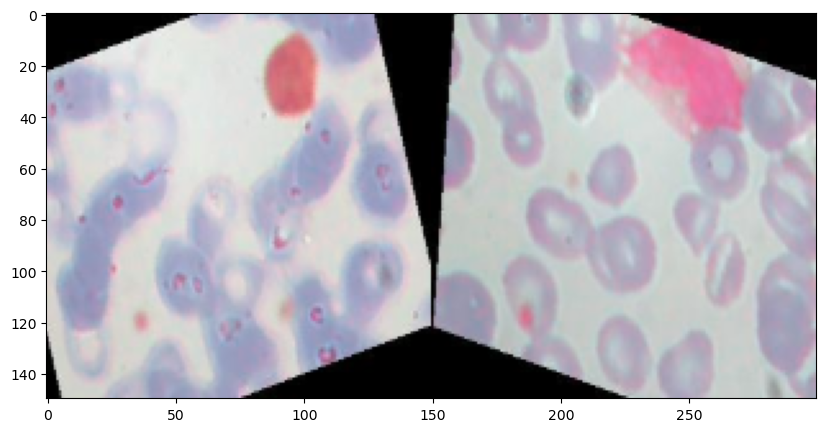

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


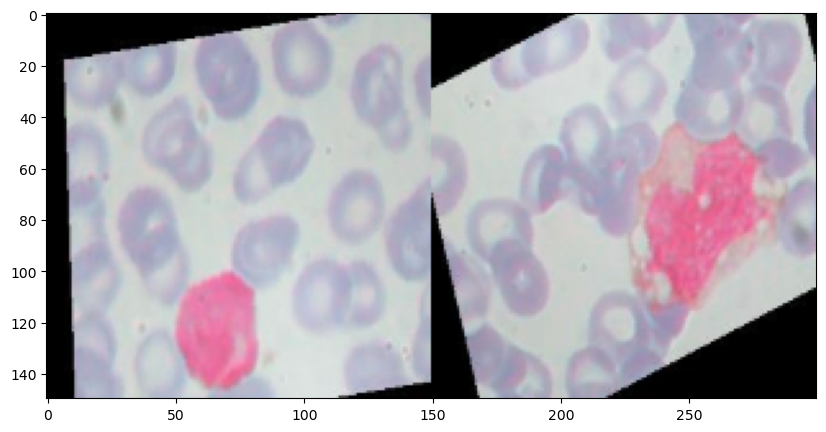

In [15]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"CANCER/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No CANCER Vs (Right) - CANCER")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it 
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

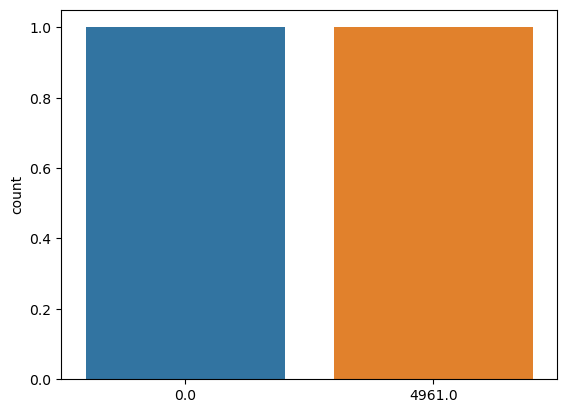

In [17]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [18]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [19]:
# filepath="weights.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

filepath = "weights.hdf5"
# Ensure that the filepath ends with '.keras'
if not filepath.endswith('.keras'):
    filepath += '.keras'

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [30]:
# from keras.models import Sequential
# from keras.layers import Dense , Activation
# from keras.layers import Dropout
# from keras.layers import Flatten
# # from keras.constraints import maxnorm
# from keras.optimizers import SGD , RMSprop
# from keras.layers import Conv2D , BatchNormalization
# from keras.layers import MaxPooling2D
# from keras.utils import np_utils
# from keras import backend as K
# K.set_image_dim_ordering('th')
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier


from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD, RMSprop
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

K.set_image_data_format('channels_first')  # Update 'th' to 'channels_first'


In [21]:
#X_train=X_train.reshape(5216,3,150,150)
#X_test=X_test.reshape(624,3,150,150)
# model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
# model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

# model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

# model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
# model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(2 , activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#                   optimizer=RMSprop(lr=0.00005),
#                   metrics=['accuracy'])

# print(model.summary())

In [42]:
import keras.backend as K

# Set the image data format to NHWC
K.set_image_data_format('channels_last')  # 'channels_last' corresponds to NHWC format


In [43]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.00005),  # Use 'learning_rate' instead of 'lr'
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 150, 150, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 150, 150, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 360000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │    23,040,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,112,274 (88.17 MB)

 Trainable params: 23,112,274 (88.17 MB)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
batch_size = 256
epochs = 10

In [45]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)


Epoch 1/10
  8/156 ━━━━━━━━━━━━━━━━━━━━ 4:52 2s/step - accuracy: 0.7452 - loss: 0.3039

KeyboardInterrupt: 

In [34]:
model.save('mymodel.h5')

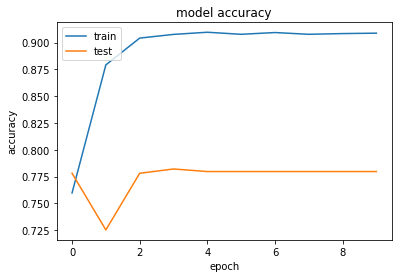

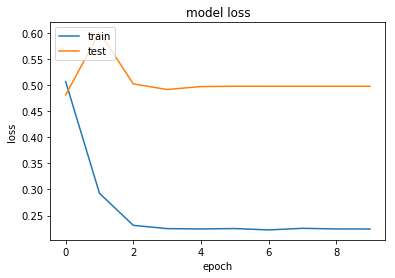

In [27]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)


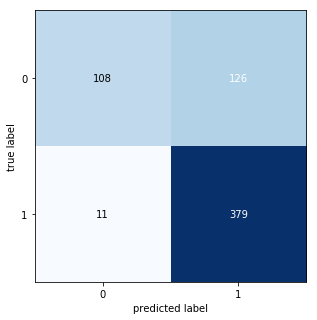

In [29]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()


In [16]:
#PRECISION = (TP/(TP+FP))
379/(379+126)

0.7504950495049505

In [17]:
#RECALL = (TP/(TP+FN))
379 / (379 + 11)


0.9717948717948718

In [18]:
#ACCURACY = (TP+TN)/(TP+TN+FP+FN)
(379+108)/(379+108+126+11)

0.780448717948718